# Modeling Notebook

This notebook is dedicated to building and training machine learning models for fraud detection in e-commerce and bank transactions. We will focus on:
- Establishing a baseline model
- Implementing ensemble models
- Evaluating model performance with appropriate metrics
- Addressing class imbalance in the dataset

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [3]:
# Path to ready-for-training CSV
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
ready_file = os.path.join(project_root, "data", "readyfortraining", "Fraud_Data_ready.csv")

df = pd.read_csv(ready_file)
df.shape
df.head()


,purchase_value,age,ip_address,signup_hour,signup_day,signup_weekday,purchase_hour,purchase_day,purchase_weekday,device_id_AAAXXOZJRZRAO,...,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,class
0,-0.160204,0.679914,7.327584e+08,1.519557,1.061630,-1.010114,-1.377455,0.308768,0.991020,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,-1.142592,2.304476,3.503114e+08,1.230382,-0.885487,1.481209,-1.522122,-0.825780,-1.501259,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,-1.197169,2.304476,2.621474e+09,0.941206,-1.572705,-0.013585,0.937208,-1.619963,-0.005891,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.385567,0.911994,3.840542e+09,1.374969,1.519775,-1.010114,0.213876,-1.279599,-1.501259,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4,0.112681,1.376155,4.155831e+08,-0.649257,0.718021,-1.010114,0.937208,-0.712325,-0.504347,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [4]:
target_col = "class"
X = df.drop(columns=[target_col])
y = df[target_col]

# Train / Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training shape: {X_train.shape}, Testing shape: {X_test.shape}")


Training shape: (219137, 535), Testing shape: (54785, 535)


In [5]:
rf = RandomForestClassifier(
    n_estimators=200, max_depth=10, random_state=42, n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])


              precision    recall  f1-score   support

           0       0.89      0.96      0.93     27393
           1       0.96      0.89      0.92     27392

    accuracy                           0.92     54785
   macro avg       0.93      0.92      0.92     54785
weighted avg       0.93      0.92      0.92     54785



0.9638170385064094

In [6]:
xgb = XGBClassifier(
    n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss'
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [22:52:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27393
           1       1.00      0.95      0.97     27392

    accuracy                           0.97     54785
   macro avg       0.97      0.97      0.97     54785
weighted avg       0.97      0.97      0.97     54785



0.9761745892034547

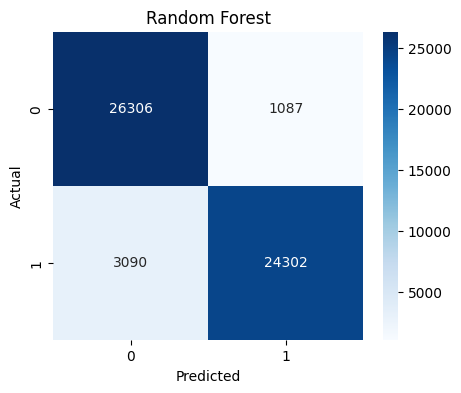

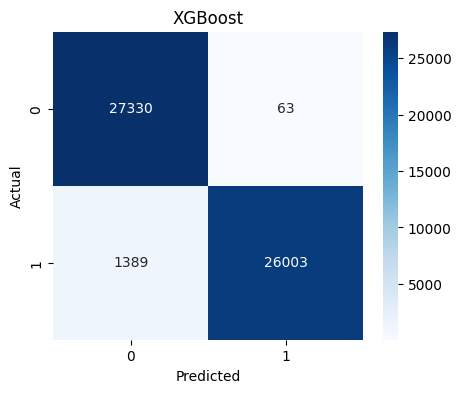

In [7]:
def plot_confusion(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion(y_test, y_pred_rf, "Random Forest")
plot_confusion(y_test, y_pred_xgb, "XGBoost")



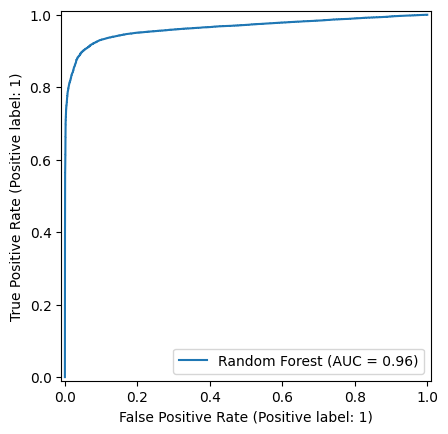

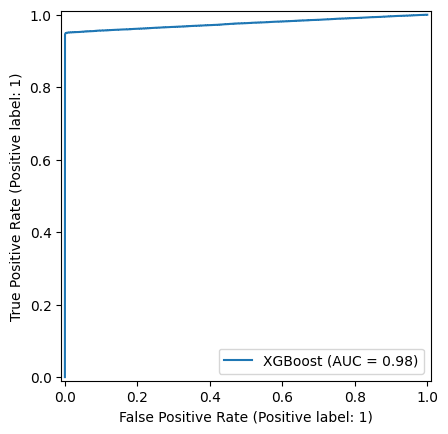

In [8]:
RocCurveDisplay.from_estimator(rf, X_test, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(xgb, X_test, y_test, name="XGBoost")
plt.show()


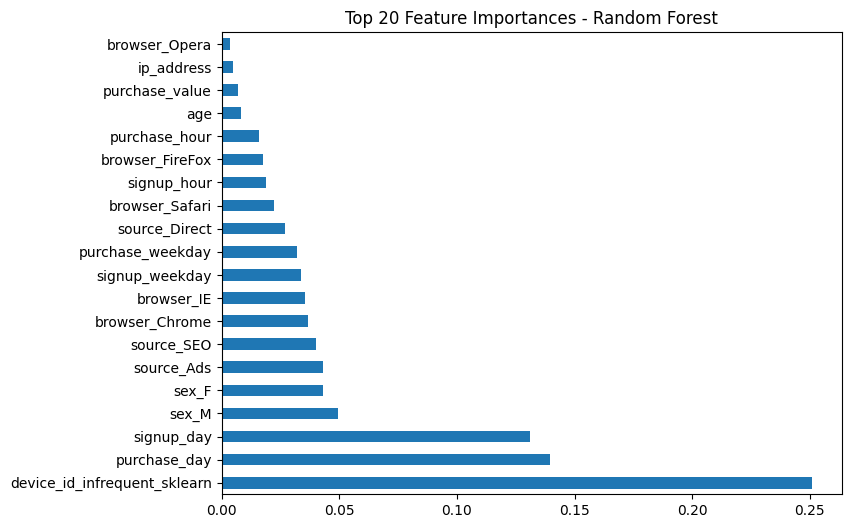

In [9]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(20).plot(kind='barh', figsize=(8,6))
plt.title("Top 20 Feature Importances - Random Forest")
plt.show()


In [11]:
import joblib
joblib.dump(rf, os.path.join(project_root, "modelsave", "rf_model.pkl"))


['c:\\Users\\HP\\Downloads\\Improved detection of fraud cases for e-commerce and bank transactions\\fraud-detection-project\\modelsave\\rf_model.pkl']